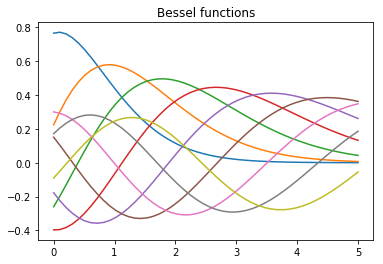

In [1]:
# 绘图案例 an example of matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('./dataset/zhengqi_train.csv')
df.columns
df.target.sample(12)


362     0.323
859     1.256
1246    0.308
2051    0.348
287     0.550
178     0.107
762     0.284
989    -1.377
1987    0.362
1310    1.738
41     -0.564
295     0.840
Name: target, dtype: float64

In [5]:
X = df.values[:, 0:-1]
Y = df['target']
model = LinearRegression()
model.fit(X, Y)
score_method = make_scorer(mean_squared_error)
scores = cross_val_score(model, X, Y, cv=3, scoring=score_method)
print(scores)



[0.10735189 0.11247772 0.14133849]


In [6]:
df_t = pd.read_csv('./dataset/zhengqi_test.csv')
res = model.predict(df_t.values[:,:])

df_res = pd.DataFrame(res, columns=['target'])
df_res.sample(23)
df_res.shape
# print(df['target'].std)



(1925, 1)

In [7]:
df_res.to_csv(r'./dataset/zhengqi_submit.txt', header=None, index=None, mode='a', sep='\t')

In [8]:
df_read = pd.read_table('./dataset/zhengqi_submit.txt')
df_read.columns
df_read.sample(10)
# df_read.shape

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,0.2682545672521412
758,0.273719
431,-1.986271
1139,0.772945
1378,-3.588749
1869,-2.188612
1597,-1.203803
955,-0.284019
978,-3.031940
97,0.816924
890,-0.181843
